# Determining Most Important Features Visually

### Approach:
1. Visualize Each Feature on Placement Status Individually 
2. Run Random Forest Feature Selection Algorithm (No Feature Scaling Required)
3. Run L1 and L2 Regularization (Penalizing Complex Models Effectivly Reducing Dimensions)
4. Go over combined or added features and visualize those
5. Attempt to Compress Data via Dimensionality Reduction (LDA for Supervised Learning)

In [102]:
import pandas as pd

# Importing Train Dataset for Intial EDA
df = pd.read_csv("../Student Placement Dataset/train.csv")

# Importing Train Dataset for Model Training
train_df = pd.read_csv("../Student Placement Dataset/train.csv")

# Impoting Test Dataset for Final Predictions
test_df = pd.read_csv("../Student Placement Dataset/test.csv")


In [68]:
# Creating DataFrame to show feature names and their data types
df_types = pd.DataFrame({ "feature": df.columns, "datatype": df.dtypes.astype(str) }) 
df_types

,feature,datatype
Student_ID,Student_ID,int64
Age,Age,int64
Gender,Gender,object
Degree,Degree,object
Branch,Branch,object
CGPA,CGPA,float64
Internships,Internships,int64
Projects,Projects,int64
Coding_Skills,Coding_Skills,int64
Communication_Skills,Communication_Skills,int64


# Age Feature
This visualization compares the age distribution between placed and not placed students. I used it to check whether age has a meaningful relationship with placement outcomes. From the plot, we can see whether placed students tend to cluster around certain age ranges or if age has minimal impact.

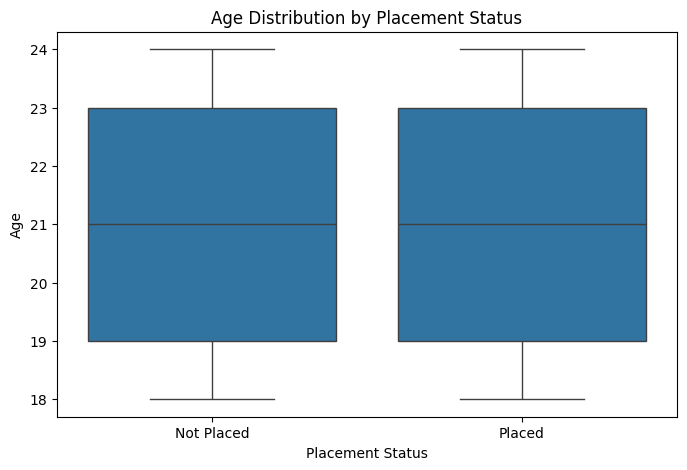

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is called df
# and the target column is named 'Placed' (values: 'Placed', 'Not Placed')

plt.figure(figsize=(8, 5))
sns.boxplot(x='Placement_Status', y='Age', data=df)

plt.title('Age Distribution by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Age')

plt.show()

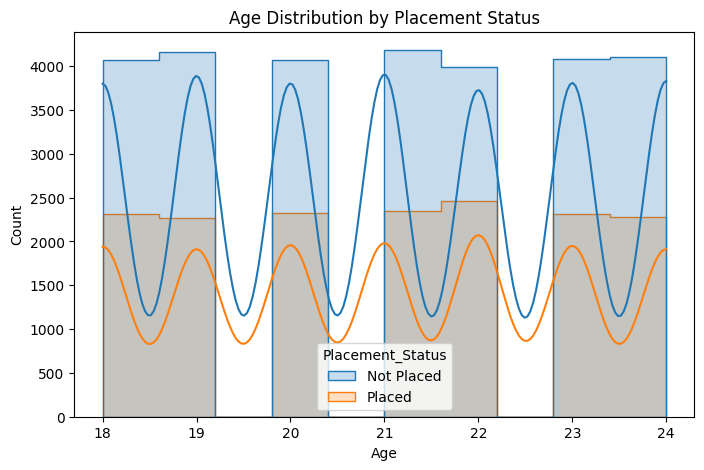

In [17]:
plt.figure(figsize=(8, 5))

sns.histplot(
    data=df,
    x='Age',
    hue='Placement_Status',
    bins=10,
    kde=True,
    element='step'
)

plt.title('Age Distribution by Placement Status')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

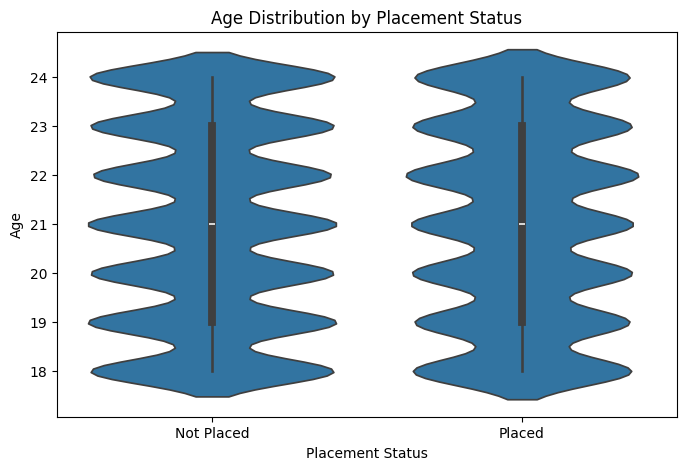

In [18]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Placement_Status', y='Age', data=df)

plt.title('Age Distribution by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Age')

plt.show()

# Gender Feature

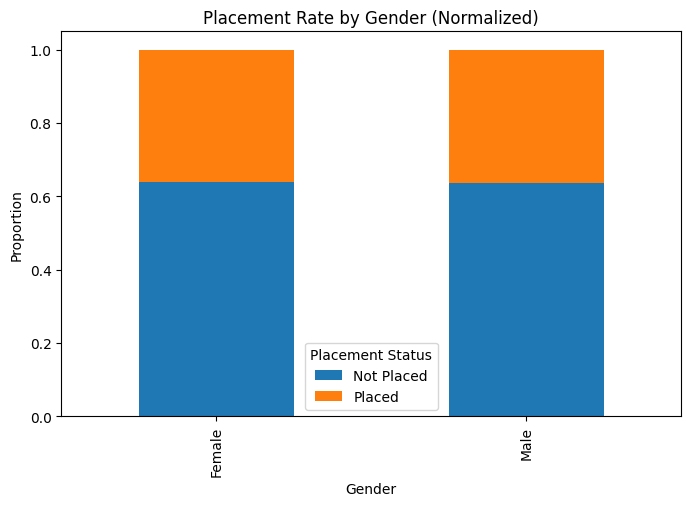

In [21]:
gender_norm = gender_placement.div(gender_placement.sum(axis=1), axis=0)

gender_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Rate by Gender (Normalized)')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Placement Status')
plt.show()

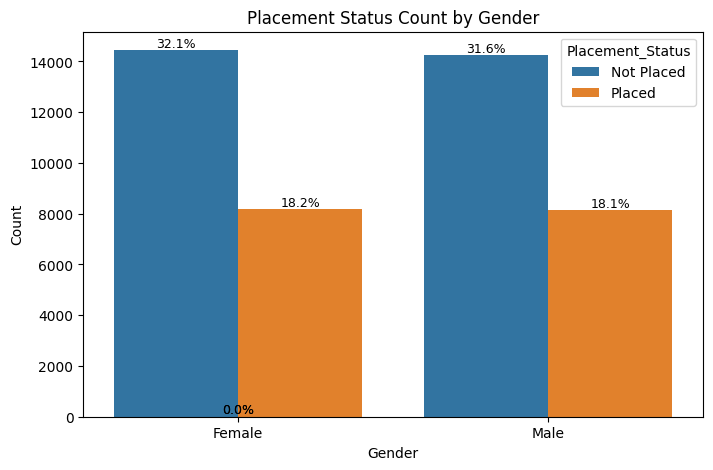

In [24]:
plt.figure(figsize=(8,5))
ax = sns.countplot(
    data=df,
    x='Gender',
    hue='Placement_Status'
)

# Add percentage labels
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height,
        f'{height/total:.1%}',
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.title('Placement Status Count by Gender')
plt.ylabel('Count')
plt.show()


# Degree Feature 
Degree is a nominal categorical feature, so instead of raw counts, I focused on normalized placement rates to avoid bias from uneven category sizes. This allowed me to identify which degrees are associated with higher placement likelihood.

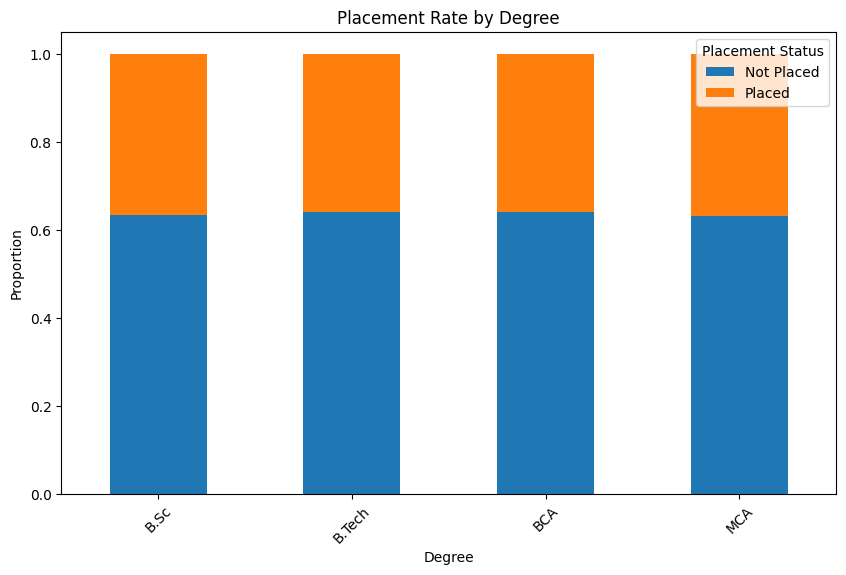

In [26]:
degree_placement = (
    df.groupby(['Degree', 'Placement_Status'])
    .size()
    .unstack()
)

degree_norm = degree_placement.div(degree_placement.sum(axis=1), axis=0)

degree_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6)
)

plt.title('Placement Rate by Degree')
plt.xlabel('Degree')
plt.ylabel('Proportion')
plt.legend(title='Placement Status')
plt.xticks(rotation=45)
plt.show()

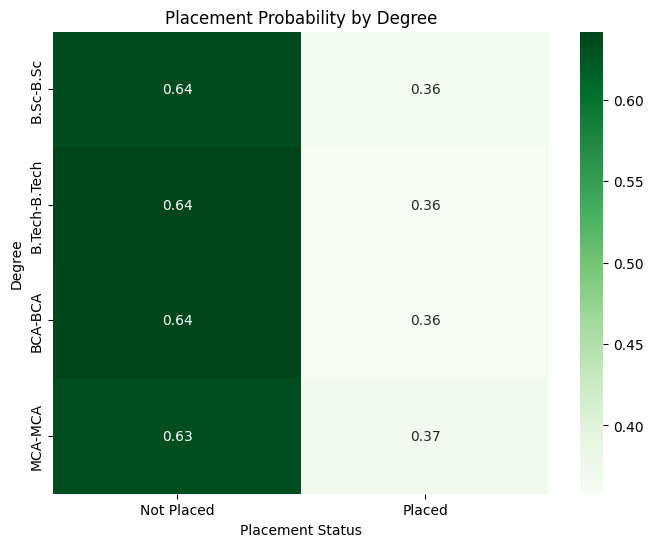

In [29]:
heatmap_data = (
    df.groupby(['Degree', 'Placement_Status'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .unstack()
)

plt.figure(figsize=(8,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f',
    cmap='Greens'
)

plt.title('Placement Probability by Degree')
plt.xlabel('Placement Status')
plt.ylabel('Degree')
plt.show()


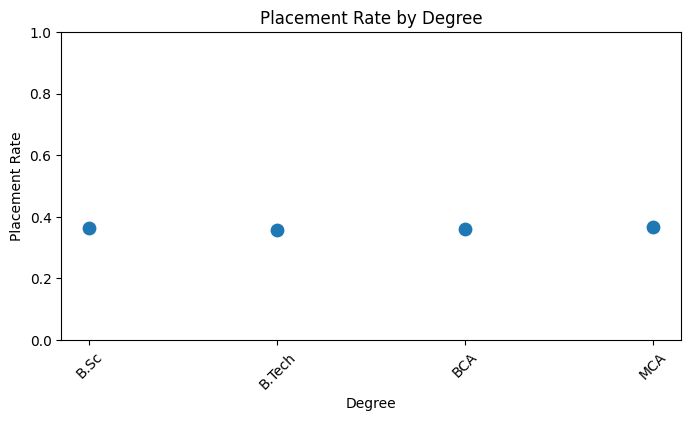

In [30]:
placement_rate = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('Degree')
    .size() / df.groupby('Degree').size()
)

plt.figure(figsize=(8,4))
plt.scatter(placement_rate.index, placement_rate.values, s=80)

plt.title('Placement Rate by Degree')
plt.xlabel('Degree')
plt.ylabel('Placement Rate')
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

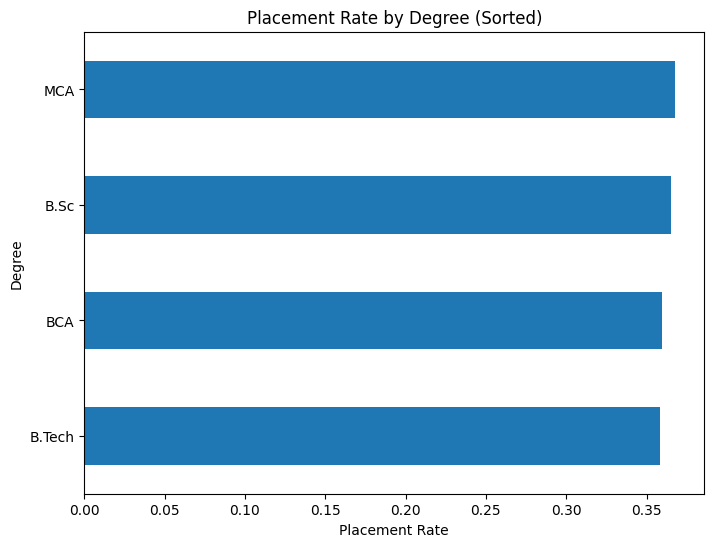

In [31]:
placement_rate.sort_values().plot(
    kind='barh',
    figsize=(8,6)
)

plt.title('Placement Rate by Degree (Sorted)')
plt.xlabel('Placement Rate')
plt.ylabel('Degree')
plt.show()

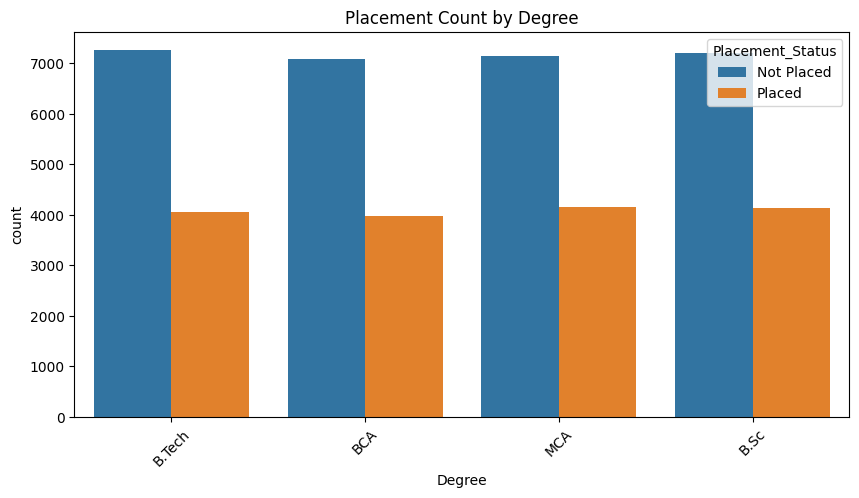

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x='Degree',
    hue='Placement_Status'
)

plt.title('Placement Count by Degree')
plt.xticks(rotation=45)
plt.show()

# Branch Feature
Branch is a nominal categorical feature, so I avoided ordinal encoding. I used one-hot encoding and validated its importance through feature importance and cross-validation.

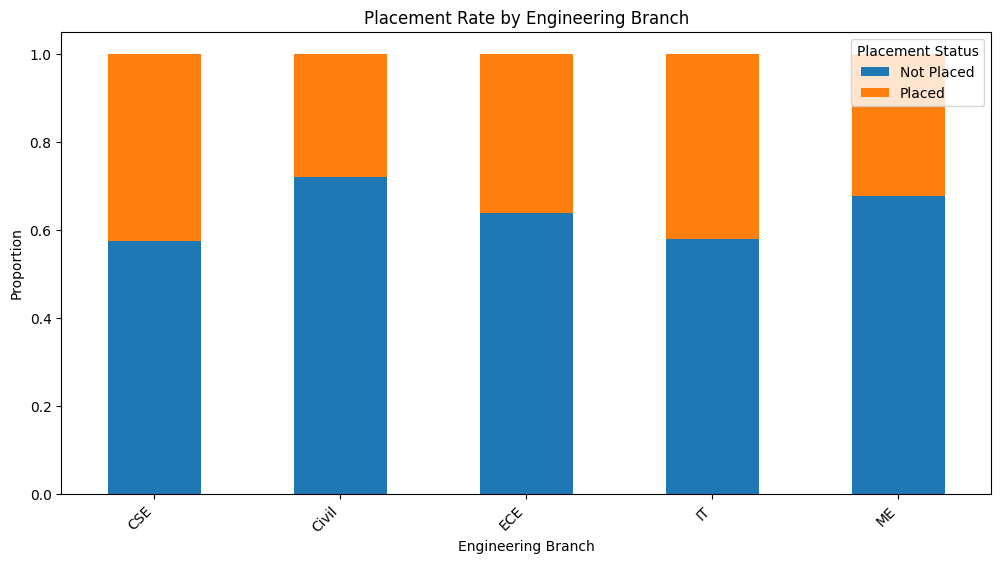

In [34]:
branch_placement = (
    df.groupby(['Branch', 'Placement_Status'])
    .size()
    .unstack()
)

branch_norm = branch_placement.div(branch_placement.sum(axis=1), axis=0)

branch_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6)
)

plt.title('Placement Rate by Engineering Branch')
plt.xlabel('Engineering Branch')
plt.ylabel('Proportion')
plt.legend(title='Placement Status')
plt.xticks(rotation=45, ha='right')
plt.show()

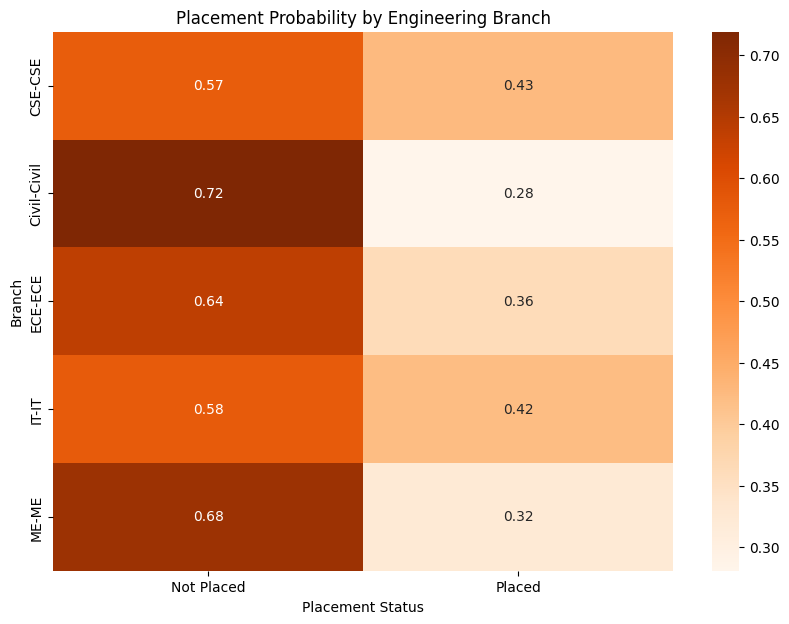

In [35]:
heatmap_data = (
    df.groupby(['Branch', 'Placement_Status'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .unstack()
)

plt.figure(figsize=(10,7))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f',
    cmap='Oranges'
)

plt.title('Placement Probability by Engineering Branch')
plt.xlabel('Placement Status')
plt.ylabel('Branch')
plt.show()

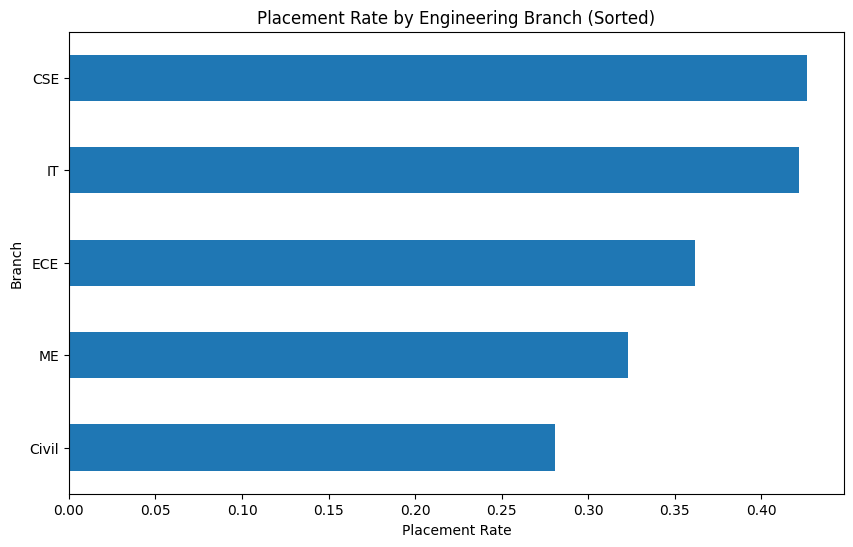

In [37]:
placement_rate = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('Branch')
    .size() / df.groupby('Branch').size()
)

placement_rate.sort_values().plot(
    kind='barh',
    figsize=(10,6)
)

plt.title('Placement Rate by Engineering Branch (Sorted)')
plt.xlabel('Placement Rate')
plt.ylabel('Branch')
plt.show()


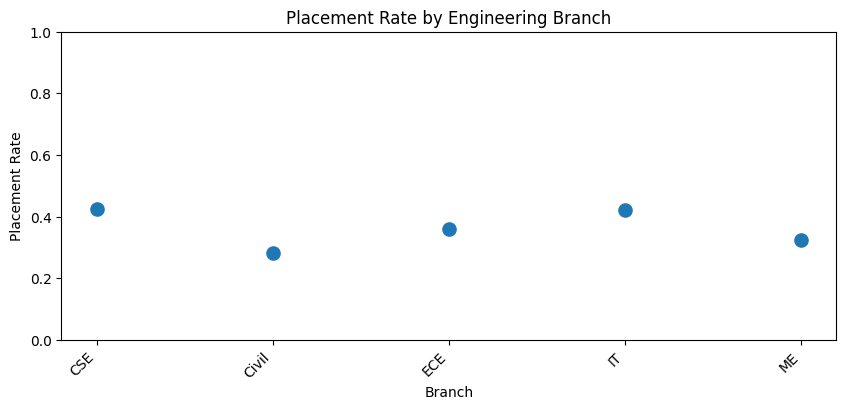

In [38]:
plt.figure(figsize=(10,4))
plt.scatter(
    placement_rate.index,
    placement_rate.values,
    s=90
)

plt.title('Placement Rate by Engineering Branch')
plt.xlabel('Branch')
plt.ylabel('Placement Rate')
plt.ylim(0,1)
plt.xticks(rotation=45, ha='right')
plt.show()

# C-GPA Feature

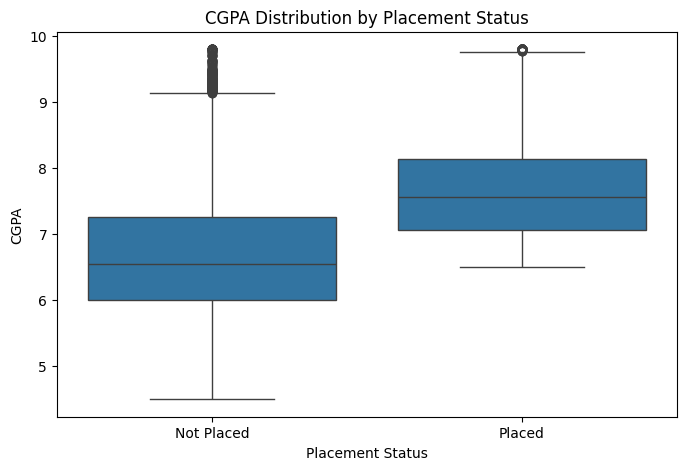

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Placement_Status', y='CGPA', data=df)

plt.title('CGPA Distribution by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('CGPA')
plt.show()

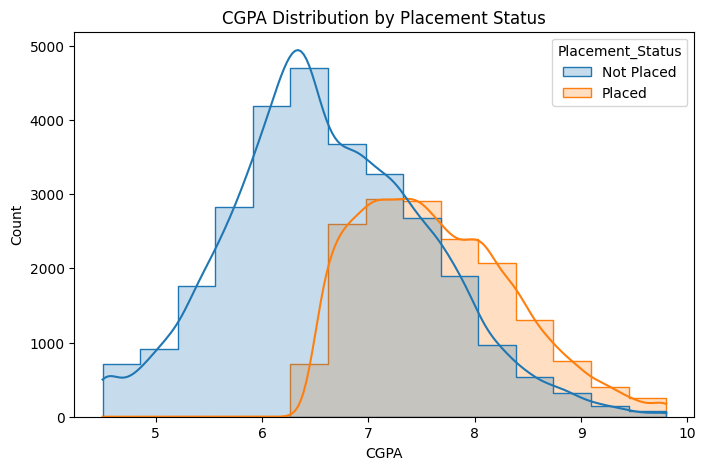

In [42]:
plt.figure(figsize=(8,5))

sns.histplot(
    data=df,
    x='CGPA',
    hue='Placement_Status',
    bins=15,
    kde=True,
    element='step'
)

plt.title('CGPA Distribution by Placement Status')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

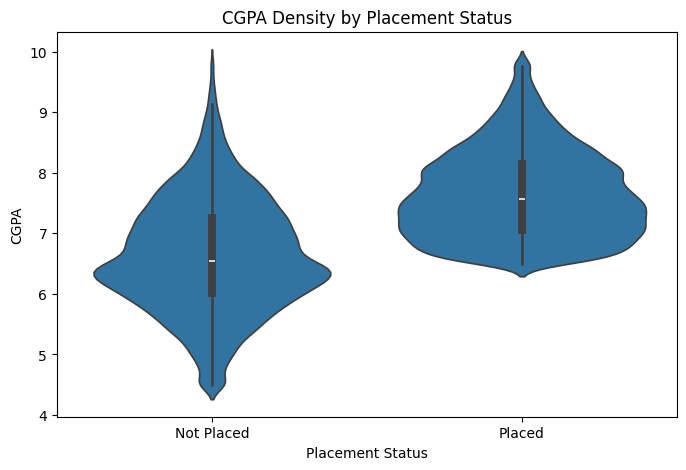

In [44]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Placement_Status', y='CGPA', data=df)

plt.title('CGPA Density by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('CGPA')
plt.show()

C:\Users\ncast\AppData\Local\Temp\ipykernel_21812\1682995637.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('CGPA_bin')
C:\Users\ncast\AppData\Local\Temp\ipykernel_21812\1682995637.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .size() / df.groupby('CGPA_bin').size()


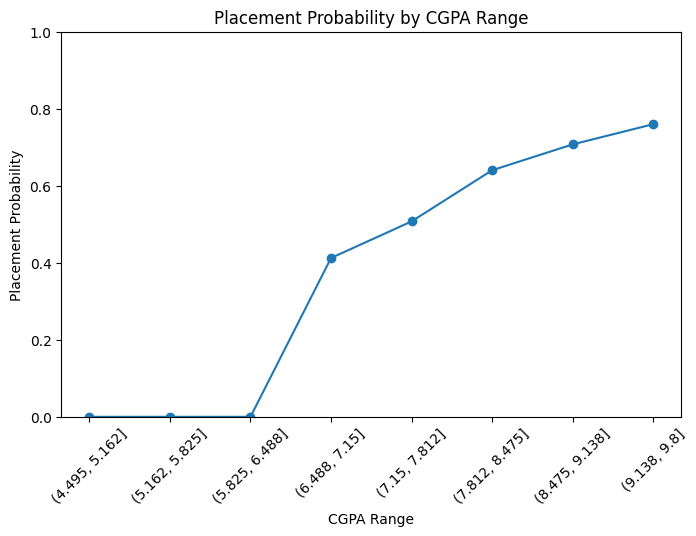

In [46]:
import numpy as np

# Bin CGPA
df['CGPA_bin'] = pd.cut(df['CGPA'], bins=8)

placement_prob = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('CGPA_bin')
    .size() / df.groupby('CGPA_bin').size()
)

plt.figure(figsize=(8,5))
plt.plot(
    placement_prob.index.astype(str),
    placement_prob.values,
    marker='o'
)

plt.title('Placement Probability by CGPA Range')
plt.xlabel('CGPA Range')
plt.ylabel('Placement Probability')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()

# Internship Feature
Internship count is a strong experiential feature; students with more internships show a consistently higher probability of placement, especially when combined with strong academic performance.

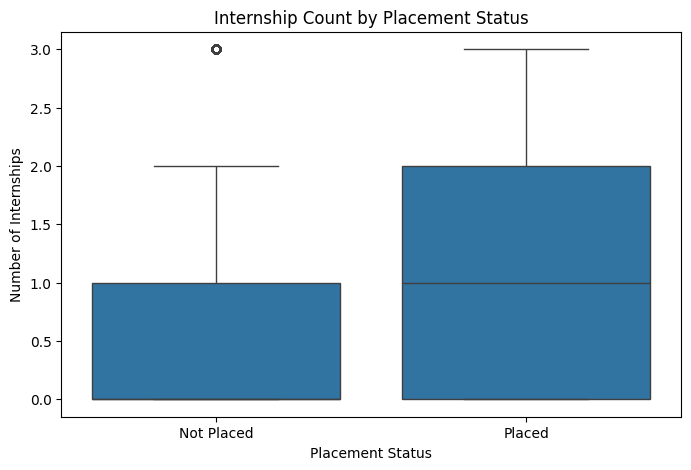

In [47]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Placement_Status', y='Internships', data=df)

plt.title('Internship Count by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Number of Internships')
plt.show()

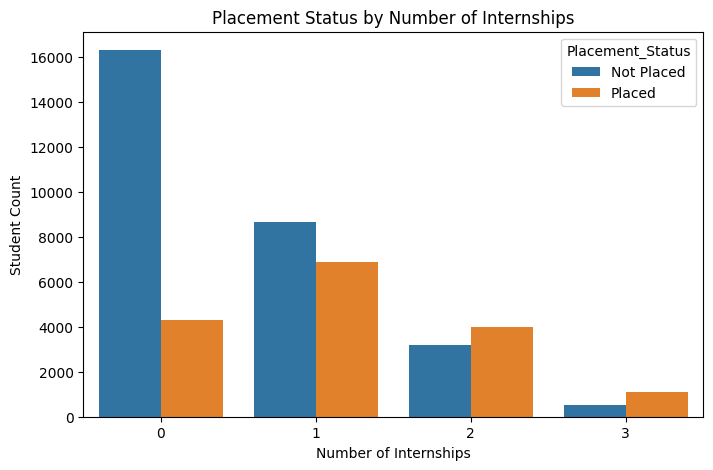

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Internships',
    hue='Placement_Status'
)

plt.title('Placement Status by Number of Internships')
plt.xlabel('Number of Internships')
plt.ylabel('Student Count')
plt.show()

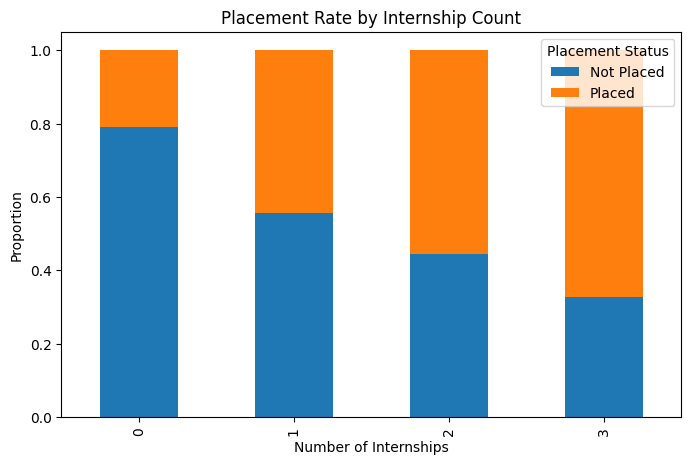

In [50]:
internship_rate = (
    df.groupby(['Internships', 'Placement_Status'])
    .size()
    .unstack()
)

internship_norm = internship_rate.div(
    internship_rate.sum(axis=1),
    axis=0
)

internship_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Rate by Internship Count')
plt.xlabel('Number of Internships')
plt.ylabel('Proportion')
plt.legend(title='Placement Status')
plt.show()

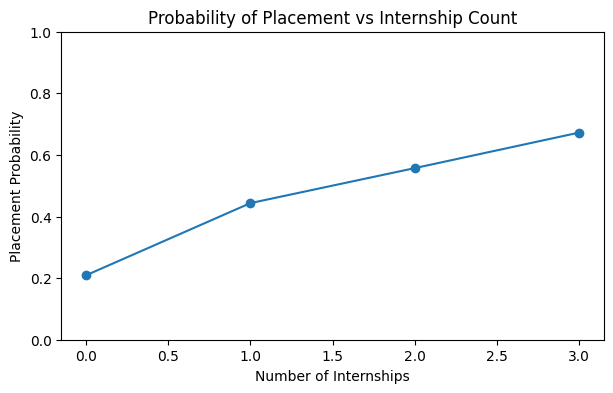

In [51]:
placement_prob = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('Internships')
    .size() / df.groupby('Internships').size()
)

plt.figure(figsize=(7,4))
plt.plot(
    placement_prob.index,
    placement_prob.values,
    marker='o'
)

plt.title('Probability of Placement vs Internship Count')
plt.xlabel('Number of Internships')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.show()

# Projects Feature
The number of projects strongly correlates with placement success; students with more project experience show a significantly higher probability of being placed.

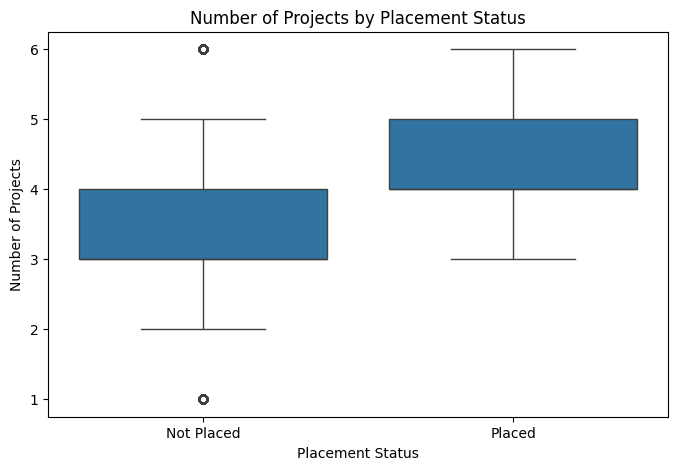

In [55]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Placement_Status', y='Projects', data=df)

plt.title('Number of Projects by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Number of Projects')
plt.show()

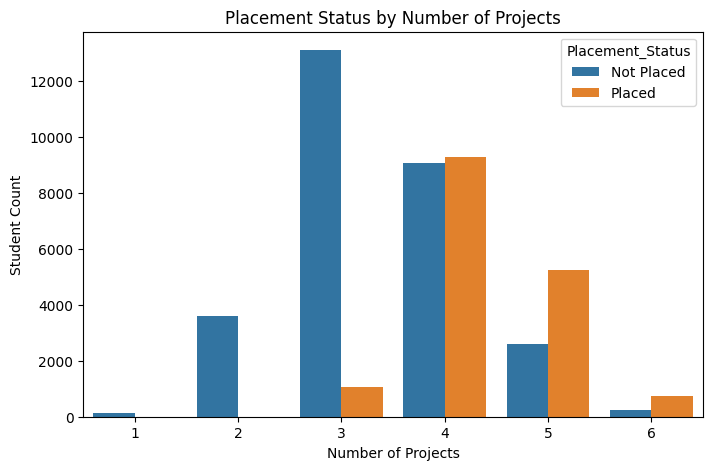

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Projects',
    hue='Placement_Status'
)

plt.title('Placement Status by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Student Count')
plt.show()

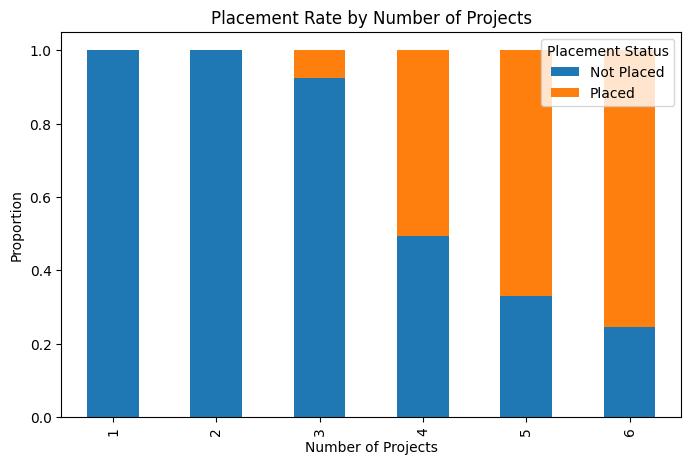

In [57]:
project_rate = (
    df.groupby(['Projects', 'Placement_Status'])
    .size()
    .unstack()
)

project_norm = project_rate.div(
    project_rate.sum(axis=1),
    axis=0
)

project_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Rate by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Proportion')
plt.legend(title='Placement Status')
plt.show()


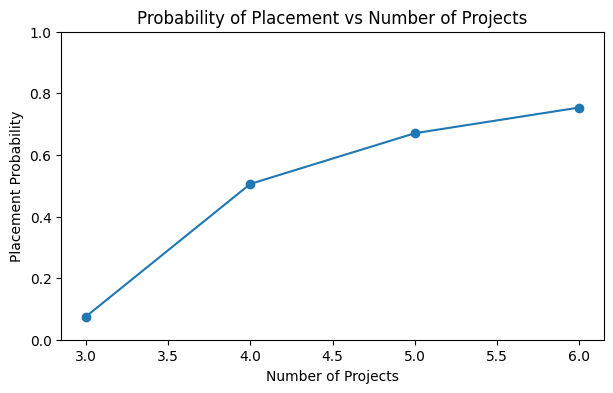

In [58]:
placement_prob = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('Projects')
    .size() / df.groupby('Projects').size()
)

plt.figure(figsize=(7,4))
plt.plot(
    placement_prob.index,
    placement_prob.values,
    marker='o'
)

plt.title('Probability of Placement vs Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.show()

# Coding Skills Feature
Coding skills are an ordinal feature, and the probability of placement increases monotonically with higher skill levels, making it one of the strongest predictors in the dataset.

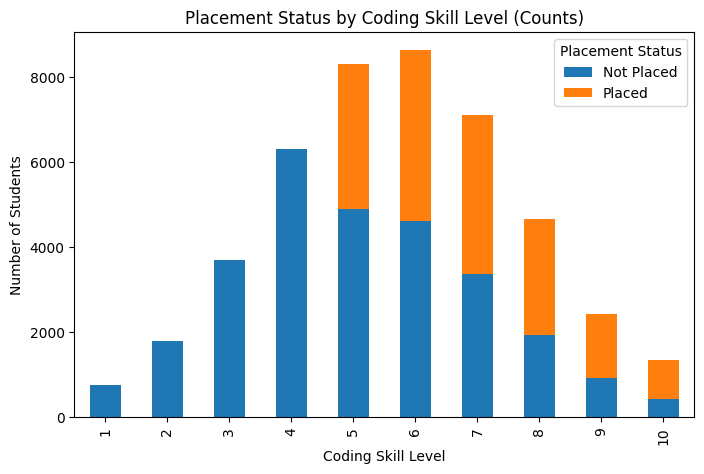

In [101]:
coding_counts = (
    df.groupby(['Coding_Skills', 'Placement_Status'])
    .size()
    .unstack(fill_value=0)
)

# Ensure ordinal order (1 → highest, or as defined in your data)
coding_counts = coding_counts.sort_index()

# Plot stacked bar chart
coding_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Status by Coding Skill Level (Counts)')
plt.xlabel('Coding Skill Level')
plt.ylabel('Number of Students')
plt.legend(title='Placement Status')
plt.show()

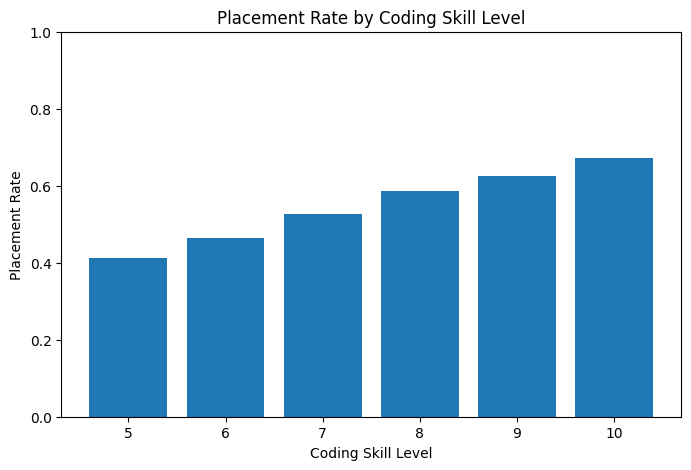

In [61]:
# Ensure correct ordering
skill_order = sorted(df['Coding_Skills'].unique())

placement_rate = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('Coding_Skills')
    .size() / df.groupby('Coding_Skills').size()
)

placement_rate = placement_rate.loc[skill_order]

plt.figure(figsize=(8,5))
plt.bar(placement_rate.index, placement_rate.values)

plt.title('Placement Rate by Coding Skill Level')
plt.xlabel('Coding Skill Level')
plt.ylabel('Placement Rate')
plt.ylim(0,1)
plt.show()

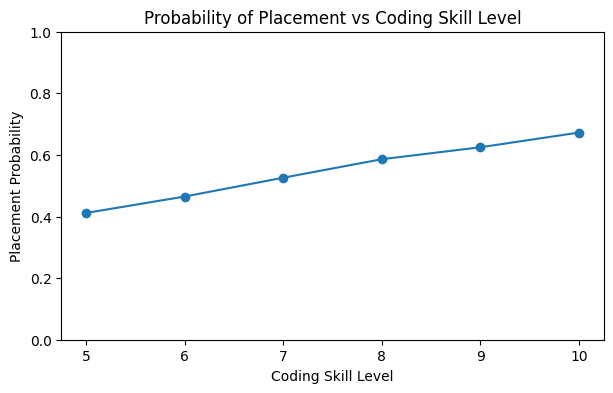

In [62]:
plt.figure(figsize=(7,4))
plt.plot(
    placement_rate.index,
    placement_rate.values,
    marker='o'
)

plt.title('Probability of Placement vs Coding Skill Level')
plt.xlabel('Coding Skill Level')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.show()

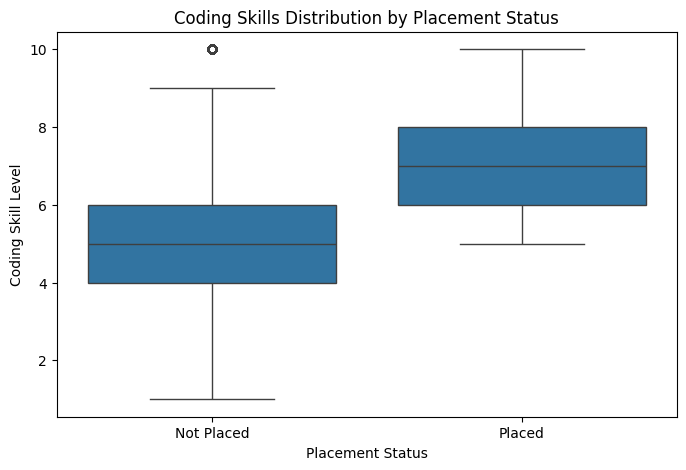

In [64]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='Placement_Status',
    y='Coding_Skills'
)

plt.title('Coding Skills Distribution by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Coding Skill Level')
plt.show()

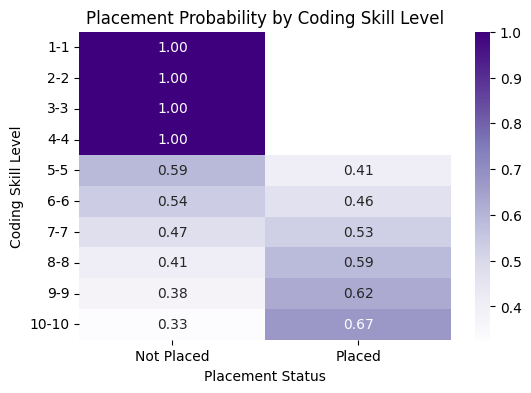

In [65]:
heatmap_data = (
    df.groupby(['Coding_Skills', 'Placement_Status'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .unstack()
)

heatmap_data = heatmap_data.loc[skill_order]

plt.figure(figsize=(6,4))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f',
    cmap='Purples'
)

plt.title('Placement Probability by Coding Skill Level')
plt.xlabel('Placement Status')
plt.ylabel('Coding Skill Level')
plt.show()

# Communication Feature

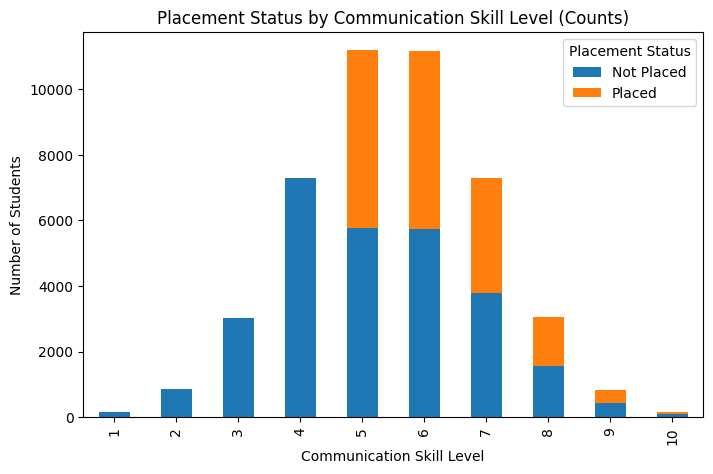

In [76]:
# Create count table
comm_counts = (
    df.groupby(['Communication_Skills', 'Placement_Status'])
    .size()
    .unstack(fill_value=0)
)

# Ensure ordinal order
comm_counts = comm_counts.sort_index()

# Plot stacked bar chart
comm_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Status by Communication Skill Level (Counts)')
plt.xlabel('Communication Skill Level')
plt.ylabel('Number of Students')
plt.legend(title='Placement Status')
plt.show()


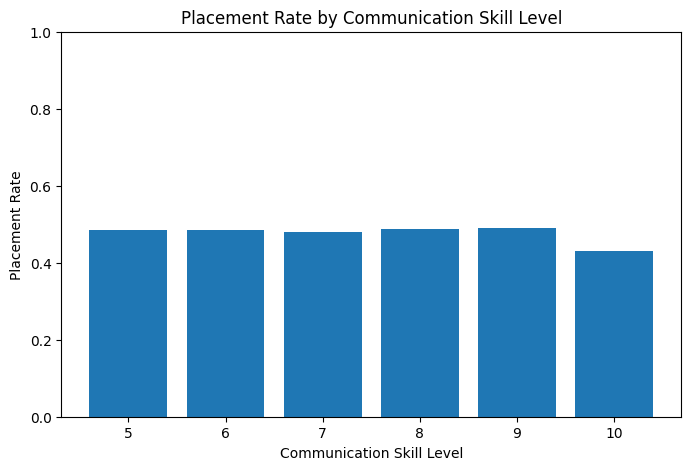

In [69]:
# Ensure correct order
comm_order = sorted(df['Communication_Skills'].unique())

placement_rate = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('Communication_Skills')
    .size() / df.groupby('Communication_Skills').size()
)

placement_rate = placement_rate.loc[comm_order]

plt.figure(figsize=(8,5))
plt.bar(placement_rate.index, placement_rate.values)

plt.title('Placement Rate by Communication Skill Level')
plt.xlabel('Communication Skill Level')
plt.ylabel('Placement Rate')
plt.ylim(0,1)
plt.show()

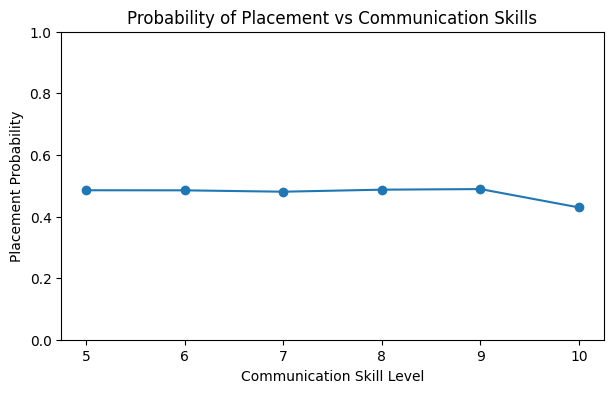

In [70]:
plt.figure(figsize=(7,4))
plt.plot(
    placement_rate.index,
    placement_rate.values,
    marker='o'
)

plt.title('Probability of Placement vs Communication Skills')
plt.xlabel('Communication Skill Level')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.show()

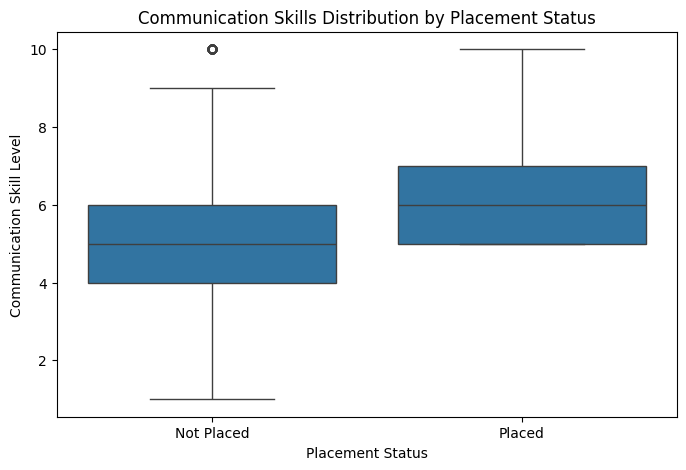

In [71]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='Placement_Status',
    y='Communication_Skills'
)

plt.title('Communication Skills Distribution by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Communication Skill Level')
plt.show()

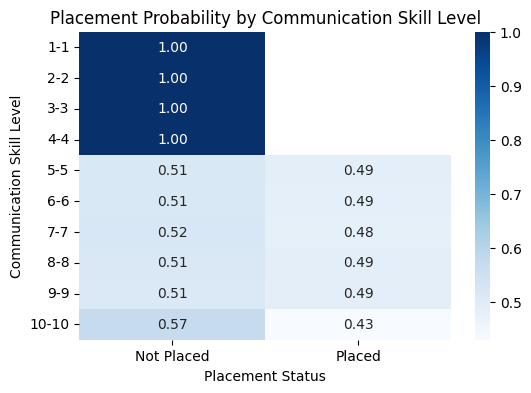

In [75]:
heatmap_data = (
    df.groupby(['Communication_Skills', 'Placement_Status'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .unstack()
)

heatmap_data = heatmap_data.loc[comm_order]

plt.figure(figsize=(6,4))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f',
    cmap='Blues'
)

plt.title('Placement Probability by Communication Skill Level')
plt.xlabel('Placement Status')
plt.ylabel('Communication Skill Level')
plt.show()


# Aptitude Test Score Feature

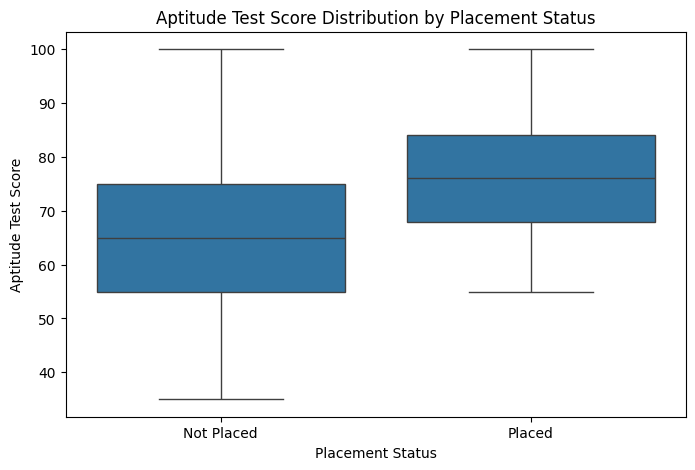

In [78]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Placement_Status', y='Aptitude_Test_Score', data=df)

plt.title('Aptitude Test Score Distribution by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Aptitude Test Score')
plt.show()

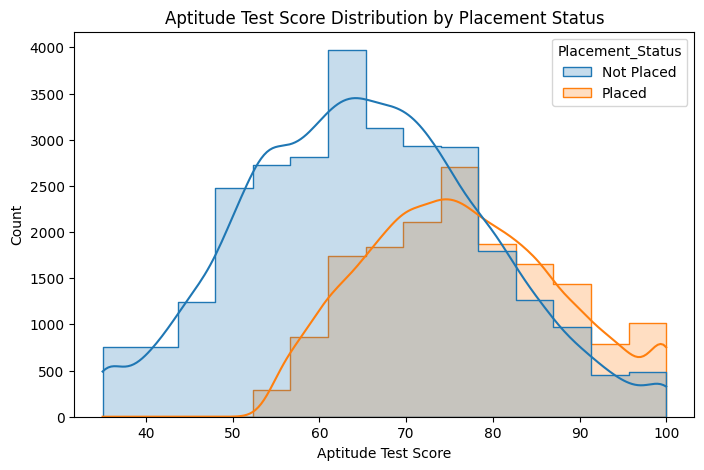

In [79]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='Aptitude_Test_Score',
    hue='Placement_Status',
    bins=15,
    kde=True,
    element='step'
)

plt.title('Aptitude Test Score Distribution by Placement Status')
plt.xlabel('Aptitude Test Score')
plt.ylabel('Count')
plt.show()

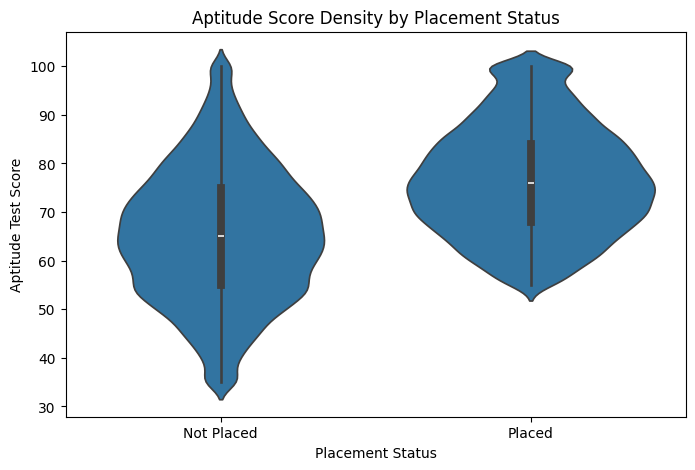

In [80]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Placement_Status', y='Aptitude_Test_Score', data=df)

plt.title('Aptitude Score Density by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Aptitude Test Score')
plt.show()

C:\Users\ncast\AppData\Local\Temp\ipykernel_21812\3064129834.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Score_bin')
C:\Users\ncast\AppData\Local\Temp\ipykernel_21812\3064129834.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .size() / df.groupby('Score_bin').size()


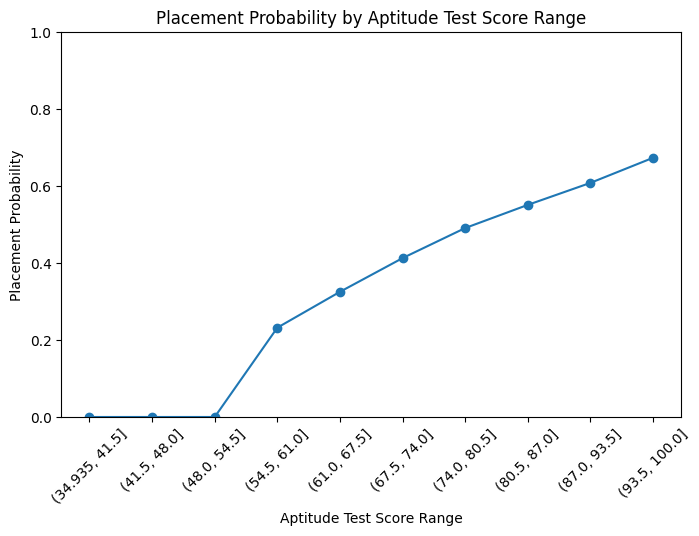

In [82]:
# Bin scores into 10-point ranges
df['Score_bin'] = pd.cut(df['Aptitude_Test_Score'], bins=10)

placement_prob = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('Score_bin')
    .size() / df.groupby('Score_bin').size()
)

plt.figure(figsize=(8,5))
plt.plot(
    placement_prob.index.astype(str),
    placement_prob.values,
    marker='o'
)

plt.title('Placement Probability by Aptitude Test Score Range')
plt.xlabel('Aptitude Test Score Range')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()


# Soft Skill Feature
Soft skills ratings (1–10) show a clear monotonic relationship with placement probability — higher-rated students are more likely to be placed, highlighting the importance of soft skills alongside technical and academic performance.

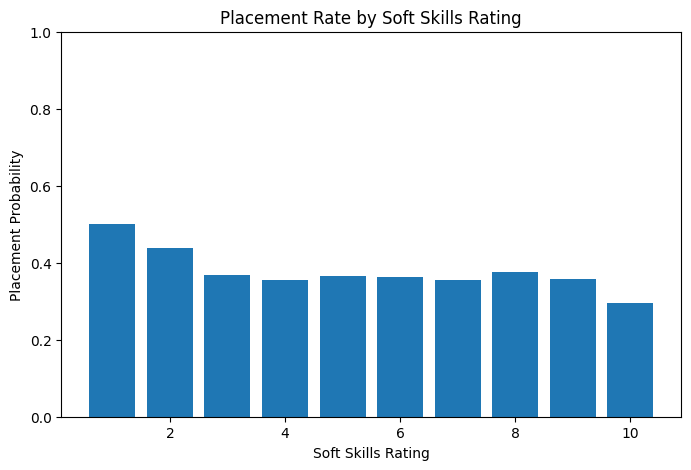

In [84]:
# Ensure ordinal order
soft_order = sorted(df['Soft_Skills_Rating'].unique())

placement_prob = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('Soft_Skills_Rating')
    .size() / df.groupby('Soft_Skills_Rating').size()
)

placement_prob = placement_prob.loc[soft_order]

plt.figure(figsize=(8,5))
plt.bar(placement_prob.index, placement_prob.values)

plt.title('Placement Rate by Soft Skills Rating')
plt.xlabel('Soft Skills Rating')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.show()

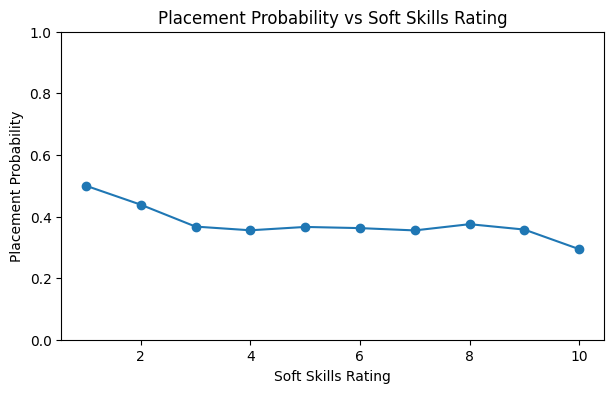

In [85]:
plt.figure(figsize=(7,4))
plt.plot(
    placement_prob.index,
    placement_prob.values,
    marker='o'
)

plt.title('Placement Probability vs Soft Skills Rating')
plt.xlabel('Soft Skills Rating')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.show()

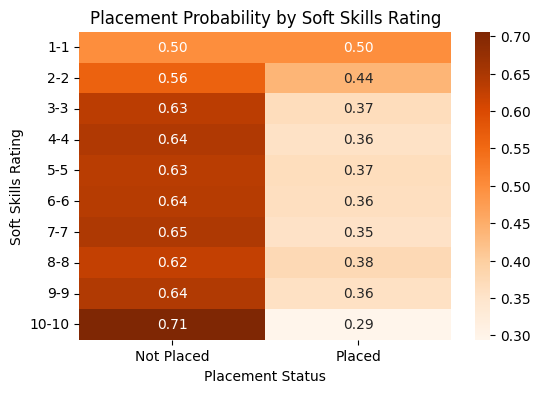

In [88]:
heatmap_data = (
    df.groupby(['Soft_Skills_Rating', 'Placement_Status'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .unstack()
)

heatmap_data = heatmap_data.loc[soft_order]

plt.figure(figsize=(6,4))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f',
    cmap='Oranges'
)

plt.title('Placement Probability by Soft Skills Rating')
plt.xlabel('Placement Status')
plt.ylabel('Soft Skills Rating')
plt.show()

# Certification Feature 
Certification count is a discrete feature, and students with more certifications generally have higher placement probability, especially when combined with practical experience from projects or internships.

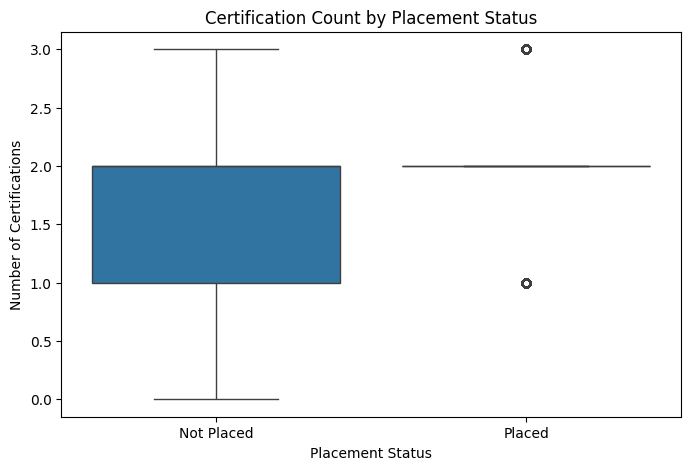

In [90]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Placement_Status', y='Certifications', data=df)

plt.title('Certification Count by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Number of Certifications')
plt.show()

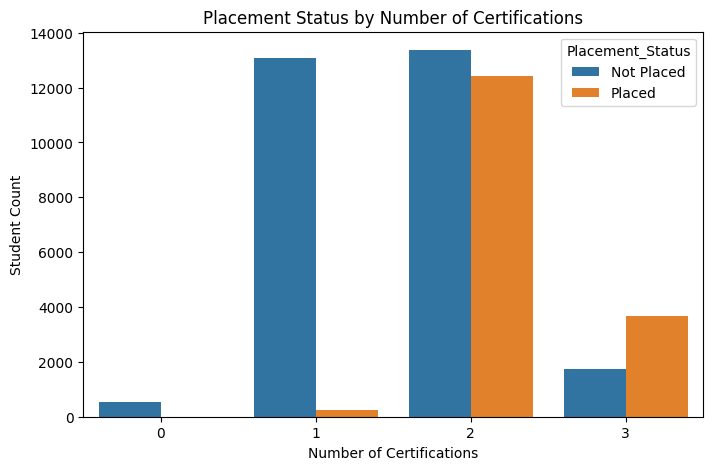

In [91]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Certifications',
    hue='Placement_Status'
)

plt.title('Placement Status by Number of Certifications')
plt.xlabel('Number of Certifications')
plt.ylabel('Student Count')
plt.show()

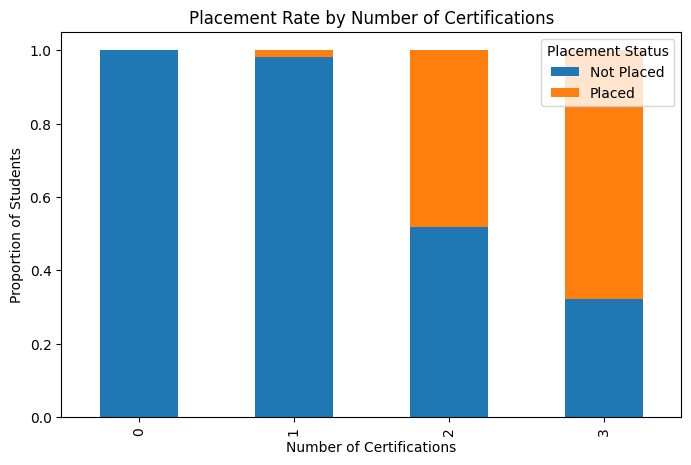

In [92]:
cert_rate = (
    df.groupby(['Certifications', 'Placement_Status'])
    .size()
    .unstack(fill_value=0)
)

cert_norm = cert_rate.div(cert_rate.sum(axis=1), axis=0)

cert_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Rate by Number of Certifications')
plt.xlabel('Number of Certifications')
plt.ylabel('Proportion of Students')
plt.legend(title='Placement Status')
plt.show()

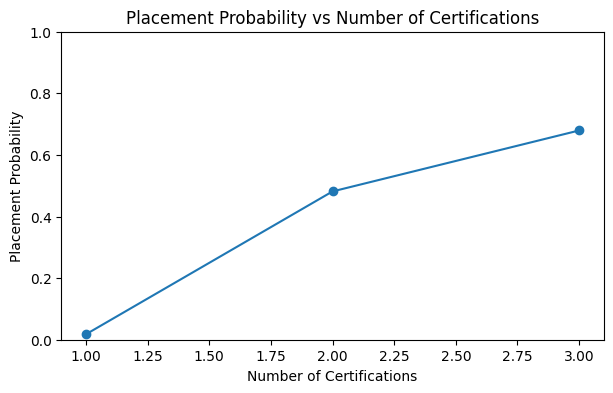

In [93]:
placement_prob = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('Certifications')
    .size() / df.groupby('Certifications').size()
)

plt.figure(figsize=(7,4))
plt.plot(
    placement_prob.index,
    placement_prob.values,
    marker='o'
)

plt.title('Placement Probability vs Number of Certifications')
plt.xlabel('Number of Certifications')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.show()

# Backlog Feature
Backlogs measure courses that a student hasn’t cleared yet. They are negatively correlated with placement, as companies prefer students who have completed their coursework on time.

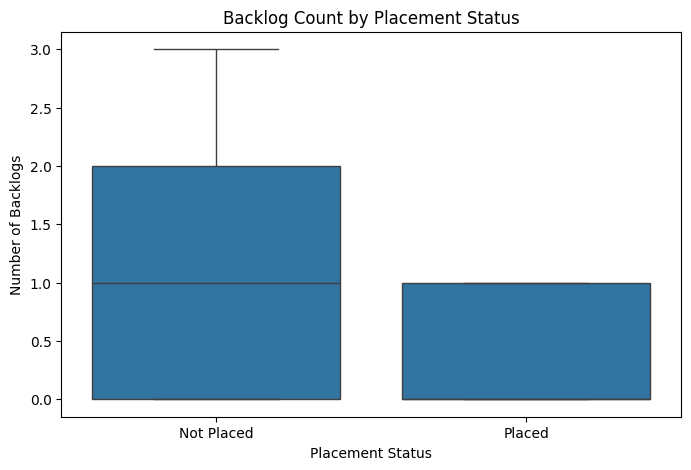

In [96]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Placement_Status', y='Backlogs', data=df)

plt.title('Backlog Count by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Number of Backlogs')
plt.show()

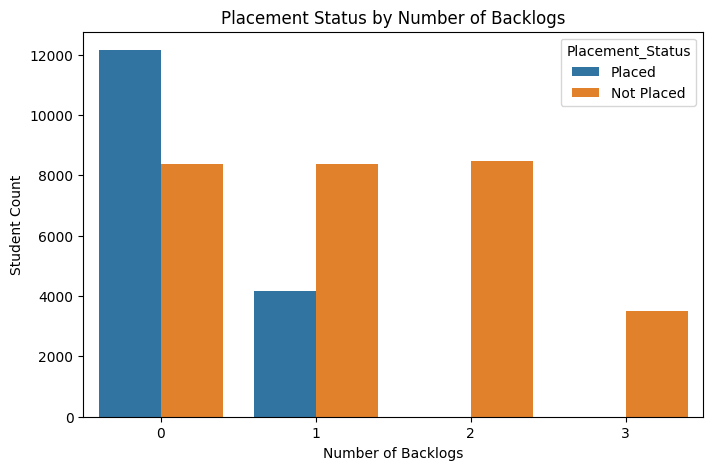

In [97]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Backlogs',
    hue='Placement_Status'
)

plt.title('Placement Status by Number of Backlogs')
plt.xlabel('Number of Backlogs')
plt.ylabel('Student Count')
plt.show()

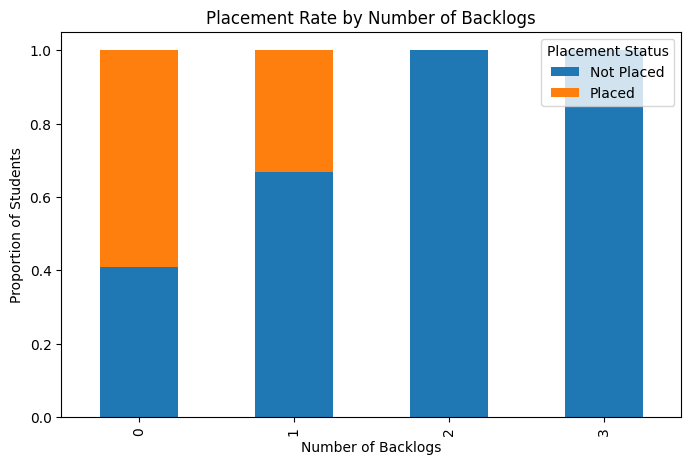

In [98]:
backlog_rate = (
    df.groupby(['Backlogs', 'Placement_Status'])
    .size()
    .unstack(fill_value=0)
)

backlog_norm = backlog_rate.div(backlog_rate.sum(axis=1), axis=0)

backlog_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Rate by Number of Backlogs')
plt.xlabel('Number of Backlogs')
plt.ylabel('Proportion of Students')
plt.legend(title='Placement Status')
plt.show()

# Using Random Forest to Find Important Features 

### Random Forest with Selected Features

Accuracy: 1.0

Confusion Matrix:
 [[3188    0]
 [   0 1812]]

Classification Report:
               precision    recall  f1-score   support

  Not Placed       1.00      1.00      1.00      3188
      Placed       1.00      1.00      1.00      1812

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000


Feature Ranking:
 1) Communication_Skills                     0.3161
 2) Backlogs                                 0.1792
 3) CGPA                                     0.1586
 4) Coding_Skills                            0.0980
 5) Projects                                 0.0975
 6) Certifications                           0.0735
 7) Aptitude_Test_Score                      0.0641
 8) Internships                              0.0094
 9) Soft_Skills_Rating                       0.0017
10) Branch_Civil                             0.0008
11) Branch_IT                                0.00

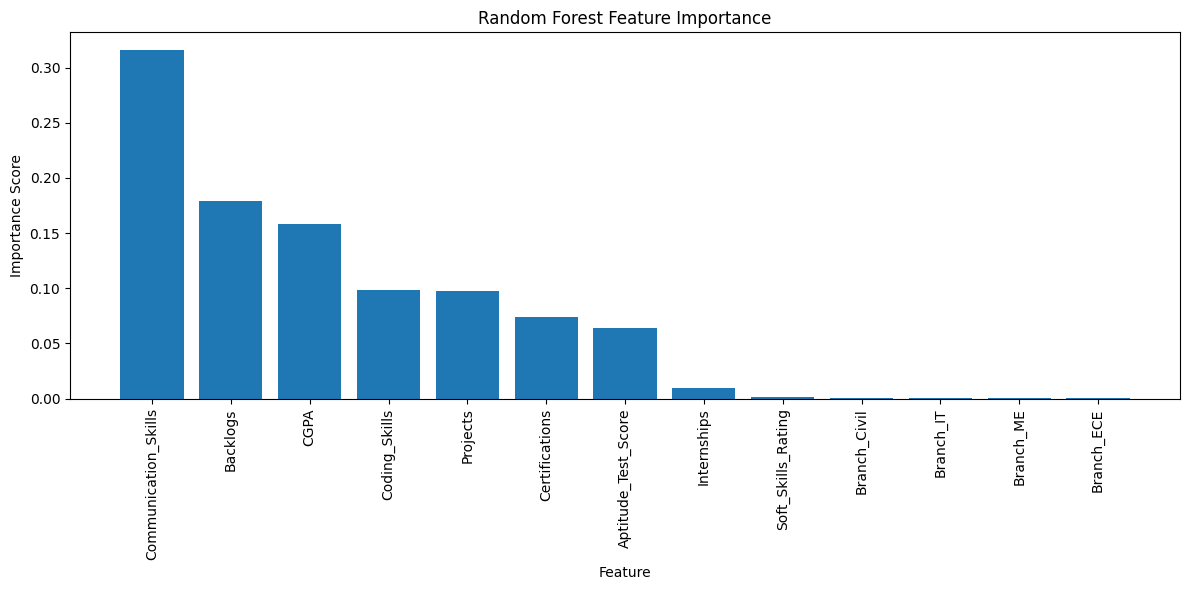

In [107]:
# Importing Train Dataset for Model Training
# train_df = pd.read_csv("../Student Placement Dataset/train.csv")

# Impoting Test Dataset for Final Predictions
# test_df = pd.read_csv("../Student Placement Dataset/test.csv")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select Features & Target
features = [
    'Communication_Skills',
    'Branch',
    'CGPA',
    'Internships',
    'Projects',
    'Coding_Skills',
    'Aptitude_Test_Score',
    'Soft_Skills_Rating',
    'Certifications',
    'Backlogs'
]

X_train = train_df[features]
y_train = train_df['Placement_Status']

X_test = test_df[features]
y_test = test_df['Placement_Status']

# One-Hot Encode ONLY
X_train_encoded = pd.get_dummies(
    X_train,
    columns=['Branch'],
    drop_first=True
)

X_test_encoded = pd.get_dummies(
    X_test,
    columns=['Branch'],
    drop_first=True
)

# Align Train & Test Columns (CRITICAL)
X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded,
    join='left',
    axis=1,
    fill_value=0
)

# Train Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42
)

rf.fit(X_train_encoded, y_train)

# Evaluate on Test Set
y_pred = rf.predict(X_test_encoded)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
importances = rf.feature_importances_
feature_names = X_train_encoded.columns

indices = np.argsort(importances)[::-1]

# Print Feature Rankings
print("\nFeature Ranking:")
for i in range(len(feature_names)):
    print(
        f"{i+1:2d}) {feature_names[indices[i]]:<40} {importances[indices[i]]:.4f}"
    )

# Feature Importance Plot
plt.figure(figsize=(12,6))
plt.title('Random Forest Feature Importance')

plt.bar(
    range(len(feature_names)),
    importances[indices],
    align='center'
)

plt.xticks(
    range(len(feature_names)),
    feature_names[indices],
    rotation=90
)

plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

### Random Forest with All Features

Accuracy: 1.0

Confusion Matrix:
 [[3188    0]
 [   0 1812]]

Classification Report:
               precision    recall  f1-score   support

  Not Placed       1.00      1.00      1.00      3188
      Placed       1.00      1.00      1.00      1812

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000


Top 15 Features (All Variables Model):
 1) Communication_Skills                     0.3147
 2) Backlogs                                 0.1787
 3) CGPA                                     0.1619
 4) Coding_Skills                            0.0979
 5) Projects                                 0.0930
 6) Certifications                           0.0731
 7) Aptitude_Test_Score                      0.0639
 8) Internships                              0.0086
 9) Age                                      0.0018
10) Soft_Skills_Rating                       0.0017
11) Branch_Civil           

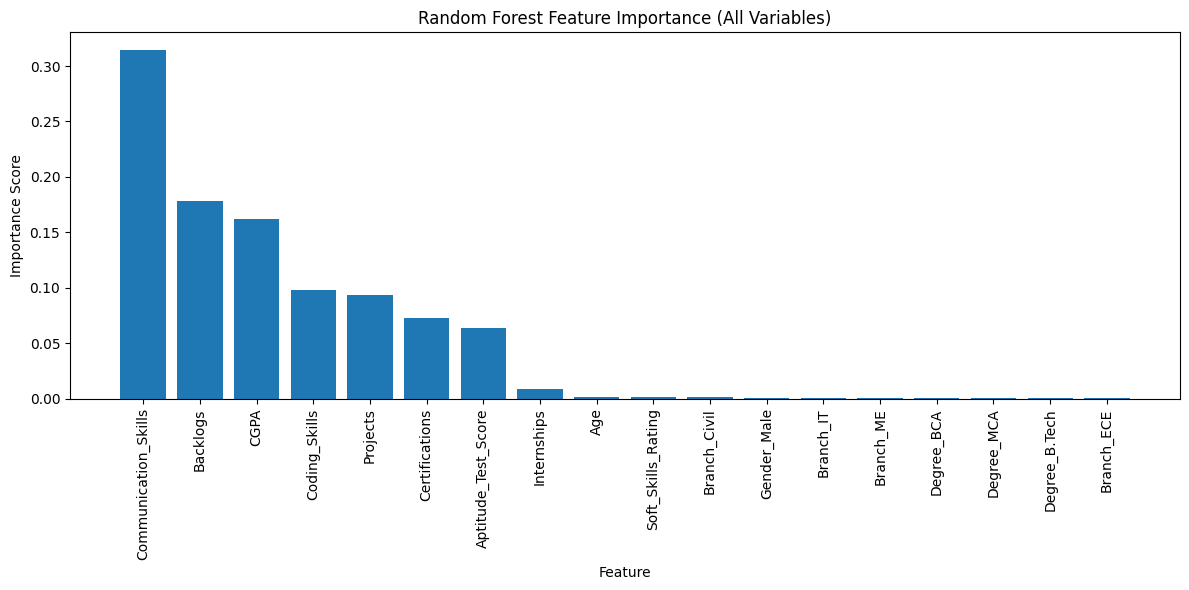

In [106]:
# All Feature Except Target
numeric_features = [
    'Age',
    'CGPA',
    'Internships',
    'Projects',
    'Coding_Skills',
    'Communication_Skills',
    'Aptitude_Test_Score',
    'Soft_Skills_Rating',
    'Certifications',
    'Backlogs'
]

categorical_features = [
    'Branch',
    'Degree',
    'Gender'
]

# Create X and Y
X_train = train_df[numeric_features + categorical_features]
y_train = train_df['Placement_Status']

X_test = test_df[numeric_features + categorical_features]
y_test = test_df['Placement_Status']

# One-Hot Encode Nominal Features
X_train_encoded = pd.get_dummies(
    X_train,
    columns=categorical_features,
    drop_first=True
)

X_test_encoded = pd.get_dummies(
    X_test,
    columns=categorical_features,
    drop_first=True
)

# Align Train & Test Columns (CRITICAL)
X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded,
    join='left',
    axis=1,
    fill_value=0
)

# Train Random Forest (Same Hyperparameters)
rf_all = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)

rf_all.fit(X_train_encoded, y_train)

# Evaluate on Test Set
y_pred_all = rf_all.predict(X_test_encoded)

print("Accuracy:", accuracy_score(y_test, y_pred_all))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_all))
print("\nClassification Report:\n", classification_report(y_test, y_pred_all))

# Feature Importance (All Variables)
importances = rf_all.feature_importances_
feature_names = X_train_encoded.columns
indices = np.argsort(importances)[::-1]

# Print Feature Rankings
print("\nTop 15 Features (All Variables Model):")
for i in range(15):
    print(
        f"{i+1:2d}) {feature_names[indices[i]]:<40} {importances[indices[i]]:.4f}"
    )

# Feature Importance Plot
plt.figure(figsize=(12,6))
plt.title('Random Forest Feature Importance (All Variables)')

plt.bar(
    range(len(feature_names)),
    importances[indices],
    align='center'
)

plt.xticks(
    range(len(feature_names)),
    feature_names[indices],
    rotation=90
)

plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()
